In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, pareto, gamma

# Parametry rozkładów
pareto_b = 2.62
gamma_shape = 2
gamma_scale = 2

# Liczebności próbek
sample_sizes = [50, 100, 500, 1000, 5000]

# Przechowaj wyniki
results_pareto = []
results_gamma = []


Powyżej zapisuję parametry rozkładów, które wybrałem (rozkład pareto oraz gamma)

In [2]:

# Przeprowadź symulacje
for n in sample_sizes:
    rejections_pareto = 0
    rejections_gamma = 0
    simulations = 1000
    for _ in range(simulations):
        # Test dla rozkładu Pareto
        sample_pareto1 = pareto.rvs(pareto_b, size=n)
        sample_pareto2 = pareto.rvs(pareto_b, size=n)
        statistic, pvalue = ks_2samp(sample_pareto1, sample_pareto2)
        if pvalue < 0.05:
            rejections_pareto += 1

        # Test dla rozkładu Gamma
        sample_gamma1 = gamma.rvs(gamma_shape, scale=gamma_scale, size=n)
        sample_gamma2 = gamma.rvs(gamma_shape, scale=gamma_scale, size=n)
        statistic, pvalue = ks_2samp(sample_gamma1, sample_gamma2)
        if pvalue < 0.05:
            rejections_gamma += 1

    results_pareto.append(rejections_pareto / simulations)
    results_gamma.append(rejections_gamma / simulations)


Przeprowadzam symulację w pętlach (1000 symulacji). Wynik zapisuje jako ilosc odrzucen (pvalue mniejsze niż 0,05) podzieloną przez ilość symulacji i otrzymuję odsetek. 

Poniżej tworzę wykres:

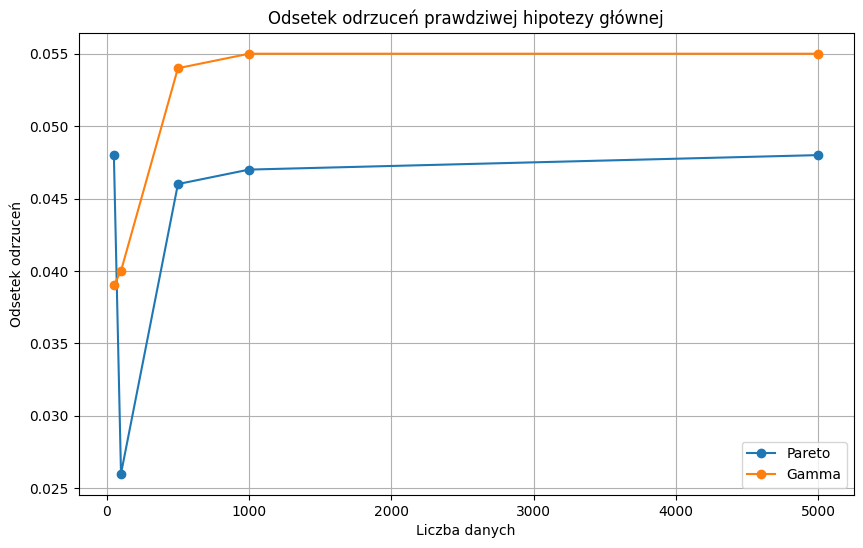

In [3]:
# Wykreśl wyniki
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, results_pareto, marker='o', label='Pareto')
plt.plot(sample_sizes, results_gamma, marker='o', label='Gamma')
plt.title('Odsetek odrzuceń prawdziwej hipotezy głównej')
plt.xlabel('Liczba danych')
plt.ylabel('Odsetek odrzuceń')
plt.legend()
plt.grid(True)
plt.show()

Wnioski i interpretacja wyników:

Wykres przedstawia odsetek odrzuceń prawdziwej hipotezy głównej (czyli błędnie stwierdzonych różnic między rozkładami) w zależności od liczby danych w próbkach. Oś pozioma (“Liczba danych”) reprezentuje liczbę punktów danych w każdej próbce, a oś pionowa (“Odsetek odrzuceń prawdziwej hipotezy głównej”) reprezentuje odsetek przypadków, w których prawdziwa hipoteza główna (że próbki pochodzą z tego samego rozkładu) została odrzucona.

Z wykresu wynika, że dla małych liczebności próbek (poniżej 1000) odsetek odrzuceń prawdziwej hipotezy głównej jest stosunkowo wysoki dla obu rozkładów. Jednak wraz ze wzrostem liczby danych, odsetek ten stabilizuje się i utrzymuje na stałym poziomie. Można to interpretować jako dowód na to, że zwiększenie liczby danych w próbkach prowadzi do poprawy dokładności testu Kołmogorowa-Smirnowa.

Dodatkowo, z wykresu wynika, że dla danego rozmiaru próbki, odsetek odrzuceń prawdziwej hipotezy głównej jest nieco wyższy dla rozkładu Pareto w porównaniu do rozkładu Gamma. Może to sugerować, że test Kołmogorowa-Smirnowa może być nieco bardziej wrażliwy na różnice w rozkładach asymetrycznych, takich jak te.

Podsumowując, wyniki te pokazują, jak ważne jest uwzględnienie rozmiaru próbki i rodzaju rozkładu przy przeprowadzaniu testów statystycznych, takich jak test Kołmogorowa-Smirnowa. Wskazują one również na potencjalne ograniczenia tego testu, zwłaszcza przy małych rozmiarach próbek i dla pewnych typów rozkładów asymetrycznych.